# Working with Tabular Data in Python

Welcome to the "Working with Tabular Data in Python" notebook!

In this notebook, you will learn how to use [pandas](https://pandas.pydata.org/) and [NumPy](https://numpy.org/), two Python libraries for working with data tables full of numerical data.

By the end of this notebook, you'll be comfortable:

* Loading data from files with pandas

* Selecting and filtering specific parts of your data

* Performing calculations on your data using NumPy

* Resolving NaNs and outliers

* Performing normalization and standardization

***Before starting this notebook, make a local copy in your Google Drive by selecting File > Save a Copy in Drive.***

----

## Loading Data with Pandas

Many scientific data tables are stored in the comma-separated-value format (CSV). These tables are easily read using the Python library `pandas`.

* Rows and Columns: Think of the file like a big table with rows and columns. Each row represents a single entry.

* Comma Separated: The values in each row are separated by commas.

* Headers (Optional): The first row can act like a header, giving names to each column.

Here's an example of a simple CSV file for a movie collection:

>`Title,Genre,Year`

>`The Shawshank Redemption,Drama,1994`

>`The Godfather,Crime,1972`

>`The Dark Knight,Action,2008`

In this example, each row represents a movie. The first row is the header with titles for each column ("Title", "Genre", "Year"). The commas separate the values in each row, like ",Drama,1994" for "The Shawshank Redemption".

CSV files are great because they're simple and almost any computer program can understand them. This makes it easy to share and work with data between different tools.  

**Let's load a CSV file of scientific RNA sequencing data from the [NASA Open Science Data Repository (OSDR)](https://osdr.nasa.gov/bio/).** This data was collected from the retinas of mice that were flown on the [Rodent Research 9 (RR9)](https://www.nasa.gov/ames/space-biosciences/rodent-research-9-spacex-12/) mission to the International Space Station. As a reminder, the RR9 mission flew several NASA experiments to the International Space Station in order to assess the effects of microgravity on different biological systems.

We will use the OSDR API to access the file programmatically. More information on the OSDR API can be found [here](https://genelab.nasa.gov/genelabAPIs).

In [1]:
import pandas as pd

# Read in the RNA sequencing CSV file into a pandas DataFrame
df = pd.read_csv('https://osdr.nasa.gov/geode-py/ws/studies/OSD-255/download?source=datamanager&file=GLDS-255_rna_seq_Normalized_Counts.csv', index_col=0)

# Print the first 5 rows of the DataFrame
df.head()

,GSM3932693,GSM3932694,GSM3932695,GSM3932696,GSM3932697,GSM3932698,GSM3932699,GSM3932700,GSM3932701,GSM3932702,GSM3932703,GSM3932704,GSM3932705,GSM3932706,GSM3932707,GSM3932708
ENSMUSG00000000001,265.491507,272.529585,264.891134,245.804042,205.478969,244.866957,250.587443,232.249604,241.739792,240.866309,278.344274,266.781019,238.447580,239.632932,242.777557,257.121918
ENSMUSG00000000028,22.737528,36.058646,30.659868,33.307123,11.896920,27.231801,21.727401,30.940275,34.840848,36.468997,29.993641,28.377921,19.433721,18.704883,26.226110,47.521611
ENSMUSG00000000031,5.574720,1.925595,2.899933,21.047427,0.000000,3.063051,7.105655,6.710188,3.266199,6.700680,1.852027,1.308210,2.248341,5.816845,2.041330,1.478741
ENSMUSG00000000037,14.601777,17.493816,16.577920,32.447456,12.940934,13.678983,9.358027,15.476949,25.085866,13.506677,24.809501,13.731740,21.564524,17.626982,28.873796,13.556234
ENSMUSG00000000049,3.107115,2.176549,0.642689,4.486992,0.895108,3.846941,2.640744,0.000000,0.000000,1.243833,0.000000,0.000000,1.676701,1.345919,0.769123,0.684388


The code above imports the `pandas` library and uses the `read_csv` function to read the data from the specified CSV file path. It then stores the data in a pandas DataFrame, which is a tabular data structure with labeled columns. Finally, it prints the first 5 rows of the DataFrame using the `head()` method.

In this CSV file, each column represents data from a different mouse, and each row represents a gene. Each entry in the table represents the expression level of a specific gene in a certain mouse.


**CHALLENGE QUESTION:** One of the genes has zero expression in 4 samples. Which gene is it?

**Double click here to enter your answer below.**

Answer:ENSMUSG00000000049


---

## Exploring a DataFrame

Below, we will use a few basic methods to explore the data.

First, the `info()` function generates a summary of a pandas DataFrame. This summary includes various informative aspects of the data stored in the DataFrame.

* Non-null count: This shows the number of non-null (not missing) values in each column.
* Data types of each column: It lists the data type of each column in the DataFrame (e.g., integer, float, object). In our data, float64 represents the following:  
  * float: The column stores decimal numbers.
  * 64: The number of bits used to store each value in the column. In this case, 64 bits provide a high degree of precision for decimal numbers.

In [2]:
# Get information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23419 entries, ENSMUSG00000000001 to ENSMUSG00002076983
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GSM3932693  23419 non-null  float64
 1   GSM3932694  23419 non-null  float64
 2   GSM3932695  23419 non-null  float64
 3   GSM3932696  23419 non-null  float64
 4   GSM3932697  23419 non-null  float64
 5   GSM3932698  23419 non-null  float64
 6   GSM3932699  23419 non-null  float64
 7   GSM3932700  23419 non-null  float64
 8   GSM3932701  23419 non-null  float64
 9   GSM3932702  23419 non-null  float64
 10  GSM3932703  23419 non-null  float64
 11  GSM3932704  23419 non-null  float64
 12  GSM3932705  23419 non-null  float64
 13  GSM3932706  23419 non-null  float64
 14  GSM3932707  23419 non-null  float64
 15  GSM3932708  23419 non-null  float64
dtypes: float64(16)
memory usage: 3.5+ MB


**CHALLENGE QUESTION:** How many genes total are measured for each sample? (Hint: look at the "Non-Null Count" column.)

**Double click here to enter your answer below.**

Answer:16

----

Next, the `df.describe()` provides a summary table of the central tendency (mean and median) and spread (standard deviation) of the numerical data in your DataFrame. This can be helpful for understanding the distribution of your data and identifying potential outliers.

* Count: This shows the number of non-null (not missing) values in each column.
* Mean: This represents the average value of the numerical data in the column.
* Std (standard deviation): This indicates how spread out the data is from the mean value in the column. A higher standard deviation suggests more variation in the data.
*Min (minimum): This shows the smallest value present in the column.
*25% (first quartile): This represents the value where 25% of the data falls below it and 75% falls above it in the column (essentially the median of the lower half of the data).
* 50% (median): This is the middle value of the data when the column is sorted numerically. It represents the value that separates the lower and upper halves of the data.
*75% (third quartile): This represents the value where 75% of the data falls below it and 25% falls above it in the column (essentially the median of the upper half of the data).
*Max (maximum): This shows the largest value present in the column.



In [3]:
# Show some summary statistics of the numerical columns
df.describe()

,GSM3932693,GSM3932694,GSM3932695,GSM3932696,GSM3932697,GSM3932698,GSM3932699,GSM3932700,GSM3932701,GSM3932702,GSM3932703,GSM3932704,GSM3932705,GSM3932706,GSM3932707,GSM3932708
count,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000
mean,512.726276,513.605503,512.227744,505.151464,511.341816,505.354348,515.216720,507.159108,502.935334,501.027174,504.417485,495.792299,515.620253,511.034582,495.971955,530.097184
std,6645.738077,6359.846063,6565.152404,6533.558532,5833.765758,6621.133118,6845.784958,7015.375606,6036.836634,5639.879241,6000.294802,5830.642219,8202.647284,6538.832473,5708.932273,6721.335537
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.699563,5.048580,4.192133,5.254688,4.670302,5.017633,4.305536,5.055508,4.994721,5.645321,4.748178,5.530256,5.345533,4.388863,5.016007,4.463735
50%,53.360684,60.744720,54.518688,60.475645,54.192978,55.422527,53.481923,58.573261,54.943407,61.707703,56.087749,56.810383,58.344083,55.151272,56.179740,55.408958
75%,330.955645,339.404120,332.633804,336.375425,330.729391,328.699611,333.251764,333.817185,331.048019,330.250317,331.580264,332.084725,327.340564,334.698276,330.558455,334.807313
max,635249.906785,599072.886767,608190.964522,617755.182030,524055.405690,635418.576947,654920.576524,680114.742215,538243.870338,499022.116456,545447.299604,526328.573490,817690.021357,609601.293711,503250.238443,580769.929410


Next, we can select specific columns to examine them more closely. In the code below, we use the square bracket notation: `df[["GSM3932693", "GSM3932694"]]` to select specific columns from the DataFrame df. We provide a list of column names enclosed in square brackets [].

In [4]:
# Select specific columns
selected_columns = df[["GSM3932693", "GSM3932694"]]
selected_columns

,GSM3932693,GSM3932694
ENSMUSG00000000001,265.491507,272.529585
ENSMUSG00000000028,22.737528,36.058646
ENSMUSG00000000031,5.574720,1.925595
ENSMUSG00000000037,14.601777,17.493816
ENSMUSG00000000049,3.107115,2.176549
...,...,...
ENSMUSG00002076937,1.183749,0.947785
ENSMUSG00002076945,0.000000,0.000000
ENSMUSG00002076971,0.000000,0.000000
ENSMUSG00002076982,0.000000,2.851473


Finally, we can filter our data based on certain conditions. The code below generates a new DataFrame, that contains only rows from the original DataFrame df that meet a specific condition (gene expression in a gene for sample "GSM3932693" has to be greater than 10).

In [5]:
# Filter rows based on conditions
filtered_df = df[df["GSM3932693"] > 10]
filtered_df

,GSM3932693,GSM3932694,GSM3932695,GSM3932696,GSM3932697,GSM3932698,GSM3932699,GSM3932700,GSM3932701,GSM3932702,GSM3932703,GSM3932704,GSM3932705,GSM3932706,GSM3932707,GSM3932708
ENSMUSG00000000001,265.491507,272.529585,264.891134,245.804042,205.478969,244.866957,250.587443,232.249604,241.739792,240.866309,278.344274,266.781019,238.447580,239.632932,242.777557,257.121918
ENSMUSG00000000028,22.737528,36.058646,30.659868,33.307123,11.896920,27.231801,21.727401,30.940275,34.840848,36.468997,29.993641,28.377921,19.433721,18.704883,26.226110,47.521611
ENSMUSG00000000037,14.601777,17.493816,16.577920,32.447456,12.940934,13.678983,9.358027,15.476949,25.085866,13.506677,24.809501,13.731740,21.564524,17.626982,28.873796,13.556234
ENSMUSG00000000056,515.459595,592.436448,615.456516,686.300687,660.315482,606.704710,546.473555,545.417477,571.442378,566.765332,604.474471,689.032279,646.185864,580.118632,579.057616,653.648743
ENSMUSG00000000058,272.539645,246.737055,301.406847,286.700927,250.318530,255.510322,294.820270,252.343288,280.848313,250.123066,269.050949,284.018558,346.487825,314.049490,297.723163,269.504851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00002076377,16.773675,38.955269,24.366373,14.640131,17.553290,6.004350,2.571689,16.077483,17.184144,23.395687,0.000000,12.142413,5.041779,9.628330,9.995297,11.388137
ENSMUSG00002076556,11.765878,12.305713,14.253173,0.000000,3.503146,23.076542,8.608132,10.347916,11.998477,3.761913,0.000000,22.134535,7.606223,0.000000,2.005837,0.000000
ENSMUSG00002076601,129.377953,131.566572,163.485172,174.605838,131.946104,108.365002,123.967427,134.508533,217.924827,109.106290,160.976576,182.619336,129.320649,138.664686,141.421076,521.661986
ENSMUSG00002076766,21.143821,23.656727,20.118139,23.409853,22.182196,21.074832,33.584441,15.984450,18.978746,23.522565,33.535375,29.888637,19.025509,34.233628,25.080663,34.821041


**CHALLENGE QUESTION:** How many genes are left in the filtered DataFrame? (Hint: look at the dimensions reported below the table.)

**Double click here to enter your answer below.**

Answer:10

---

## Numerical Operations in NumPy

Now, we will use the NumPy library to demonstrate a few useful numerical operations that can be performed on a DataFrame.

First, we can calculate the mean (average) expression level for each gene across all samples. In the code below, we use the NumPy function `.mean()` to calculate the mean of each gene (`axis=1` refers to rows).

In [6]:
import numpy as np

# Calculate mean expression for each gene (print the first 10 genes)
mean_expression = np.mean(df, axis=1)
"Mean Expression:", mean_expression[0:10]

('Mean Expression:',
 ENSMUSG00000000001    249.225664
 ENSMUSG00000000028     28.507956
 ENSMUSG00000000031      4.564934
 ENSMUSG00000000037     18.208199
 ENSMUSG00000000049      1.469756
 ENSMUSG00000000056    603.705612
 ENSMUSG00000000058    279.511444
 ENSMUSG00000000078    316.335795
 ENSMUSG00000000085    625.826657
 ENSMUSG00000000088    895.618176
 dtype: float64)

**CHALLENGE QUESTION:** Which gene has the highest mean expression across all samples? Which gene has the lowest?

**Double click here to enter your answer below.**

Answer: ENSMUSG00000000088

----
Similarly, we can use the NumPy function `.std()` to calculate the [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of each gene.

In [7]:
# Calculate standard deviation for each gene
std_dev = np.std(df, axis=1)
"Standard Deviation:", std_dev[0:10]

('Standard Deviation:',
 ENSMUSG00000000001    17.467282
 ENSMUSG00000000028     8.285139
 ENSMUSG00000000031     4.767229
 ENSMUSG00000000037     6.289848
 ENSMUSG00000000049     1.373370
 ENSMUSG00000000056    49.944069
 ENSMUSG00000000058    26.410608
 ENSMUSG00000000078    36.351816
 ENSMUSG00000000085    80.567502
 ENSMUSG00000000088    63.691284
 dtype: float64)

Next, we can identify which genes have the highest average expression across all samples. This is a useful way of identifying unusual trends in a dataset.

The code below finds the top 3 most highly expressed genes based on their average expression across samples.
* `df.mean(axis=1)` calculates the average expression level for each sample *(`axis=1` refers to rows).
* `.sort_values(ascending=False)` sorts the genes by their average expression in descending order (highest first).
* `.head(3).index.tolist()` selects the top 3 entries and converts the index (gene names) to a list.

In [8]:
# Find top 3 most highly expressed genes (average expression)
top_genes = df.mean(axis=1).sort_values(ascending=False).head(3).index.tolist()
print("Top 3 Expressed Genes:", top_genes)

Top 3 Expressed Genes: ['ENSMUSG00000118866', 'ENSMUSG00000118841', 'ENSMUSG00000030324']


## Handling Missing Values (NaNs)

Next, we will generate a sample DataFrame with some missing values (NaNs - "not a number") in order to demonstrate a few useful data preparation techniques.

In [9]:
# Create a sample DataFrame with missing values
data = {'Age': [25, 30, 22, 40, 35, np.nan],
        'Salary': [50000, 70000, 45000, 80000, 60000, 120000],
        'Experience': [2, 5, 1, 8, 4, None]}
df = pd.DataFrame(data)
df

,Age,Salary,Experience
0,25.0,50000,2.0
1,30.0,70000,5.0
2,22.0,45000,1.0
3,40.0,80000,8.0
4,35.0,60000,4.0
5,NaN,120000,NaN


We will now check how many missing values (NaNs) exist in each column of the DataFrame, using the `.isnull()` function:

In [10]:
# Check for missing values (NaNs)
print(df.isnull().sum())  # Check how many missing values in each column

Age           1
Salary        0
Experience    1
dtype: int64


If your data has missing values (NaNs), that can be a problem for downstream analysis such as machine learning. Two common approaches for dealing with missing values are to fill them with specific values such as the mean or median of the other values, or to drop rows or columns that contain missing values.

**Option 1: Filling with specific values (e.g., mean or median):**

In the code below, we fill the missing values in the "Age" column with the mean of the other age values. We then fill the missing values in the "Experience" column with the median of the other experience values. We print out the new DataFrame to ensure that there are no NaNs left.

In [11]:
# Fill missing values in 'Age' with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill missing values in 'Experience' with median
df['Experience'].fillna(df['Experience'].median(), inplace=True)

df

<ipython-input-11-b3f3854f0960>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-11-b3f3854f0960>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,Age,Salary,Experience
0,25.0,50000,2.0
1,30.0,70000,5.0
2,22.0,45000,1.0
3,40.0,80000,8.0
4,35.0,60000,4.0
5,30.4,120000,4.0


**Option 2: Dropping rows with missing values (not recommended if many missing values):**

In the second option, we drop rows that contain missing values using the `dropna()` function. However, if there are many missing values in your DataFrame, this is not recommended because you will be losing a lot of data.

In [12]:
data = {'Age': [25, 30, 22, 40, 35, np.nan],
        'Salary': [50000, 70000, 45000, 80000, 60000, 120000],
        'Experience': [2, 5, 1, 8, 4, None]}
df = pd.DataFrame(data)

df.dropna(inplace=True)
df

,Age,Salary,Experience
0,25.0,50000,2.0
1,30.0,70000,5.0
2,22.0,45000,1.0
3,40.0,80000,8.0
4,35.0,60000,4.0


## 4. Identifying Outliers

**Outliers** are data points that fall significantly outside the main distribution of the data. They can be very high or very low values compared to the majority of the data points in a column.

Outliers can significantly influence calculations like mean, median, and standard deviation. This can distort our understanding of the data. Machine learning algorithms often rely on assumptions about the underlying data distribution. Outliers can violate these assumptions and lead to inaccurate models.

A **boxplot** is a way to visualize how data is spread out.
* It has a box in the middle with a line in the center representing the median (the middle value when the data is ordered).
* The box shows the interquartile range (IQR), which represents the middle half of the data.
* There are lines extending from the box called whiskers. These whiskers typically extend to 1.5 times the IQR above and below the box.
* **Points outside the whiskers are considered potential outliers.**

The code below utilizes the `matplotlib.pyplot()` function to create a boxplot and visualize potential outliers in the `Salary` column:

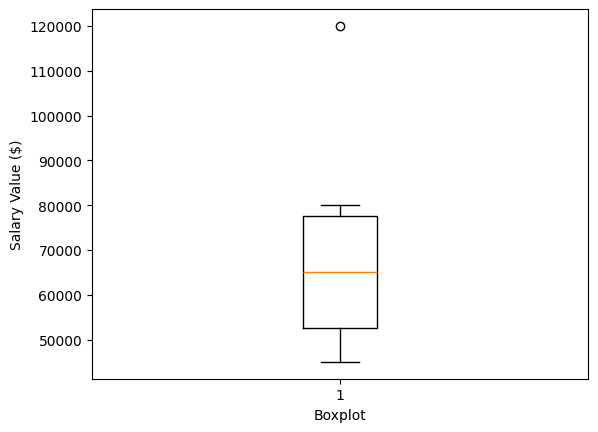

In [13]:
import matplotlib.pyplot as plt

data = {'Age': [25, 30, 22, 40, 35, np.nan],
        'Salary': [50000, 70000, 45000, 80000, 60000, 120000],
        'Experience': [2, 5, 1, 8, 4, None]}
df = pd.DataFrame(data)

# Create a boxplot
plt.boxplot(df['Salary'])

# Label the axes
plt.xlabel("Boxplot")  # X-axis label
plt.ylabel("Salary Value ($)")  # Y-axis label (generic for now)

# Show the plot
plt.show()

**CHALLENGE QUESTION:** How many outliers are there in the "Salary" column of the dataset? Are they very high or very low outliers?

**Double click here to enter your answer below.**

Answer:1; very high: 120000

---

## 5. Removing Outliers (cautiously!)

In some cases, it is appropriate to remove outliers from a dataset prior to downstream analysis such as machine learning. However, it is important to consider domain knowledge before removing data points in case they are important, and to transparently document the process of removing data points.

In the code below, we calculate the lower and upper bounds for outliers based on 1.5 times the IQR from the quartiles. We then filter the DataFrame to keep only rows where the `Salary` falls within the calculated bounds.

In [14]:
# Option 1: Remove outliers (be cautious, consider domain knowledge)
# IQR (Interquartile Range) based outlier detection
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
df = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]
df

,Age,Salary,Experience
0,25.0,50000,2.0
1,30.0,70000,5.0
2,22.0,45000,1.0
3,40.0,80000,8.0
4,35.0,60000,4.0


## Normalization (0-1 scale)

Machine learning algorithms often work better when features are on a similar scale. **Normalization** and **standardization** can improve the performance of the model.

Normalizing data between 0 and 1 for machine learning algorithms can be beneficial for several reasons:

* Equal Footing: Features on different scales are put on a common ground, preventing features with larger values from dominating the learning process.
* Improved Convergence: Normalization can help some algorithms converge faster during the training process, leading to potentially better models.
* Distance-based Algorithms: Normalization is particularly important for algorithms that rely on distance metrics (like k-Nearest Neighbors) to function effectively.

In the code below, we normalize the features in the DataFrame to a range between 0 and 1:

In [15]:
# Normalization (scale to range 0-1)
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm

,Age,Salary,Experience
0,0.166667,0.142857,0.142857
1,0.444444,0.714286,0.571429
2,0.000000,0.000000,0.000000
3,1.000000,1.000000,1.000000
4,0.722222,0.428571,0.428571


## Standardization (mean 0, std 1)

Standardizing data to have a mean of 0 and standard deviation of 1 is useful in machine learning because it:

* Levels the Playing Field: Features are centered around the same mean, preventing features with larger scales from disproportionately influencing the model.
* Improves Interpretation: Standardized coefficients in the model become easier to interpret since they represent the relative impact of each feature in units of standard deviation.


In the code below, we standardize the DataFrame using `sklearn.preprocessing.StandardScaler()`.

In [16]:
# Standardization (scale to mean 0 and standard deviation 1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
print(df_scaled)

[[-0.82696125 -0.85895569 -0.81649658]
 [-0.06125639  0.70278193  0.40824829]
 [-1.28638417 -1.2493901  -1.22474487]
 [ 1.47015334  1.48365074  1.63299316]
 [ 0.70444848 -0.07808688  0.        ]]
